<a href="https://colab.research.google.com/github/SunilKumarSingh84/Keras/blob/main/TF_Keras_FashionMNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout, GlobalMaxPooling2D 

X_train.shape: (60000, 28, 28) y_train.shape: (60000,) X_test.shape: (10000, 28, 28) y_test.shape: (10000,)
number of classes: 10
sample image -


(60000, 28, 28, 1)

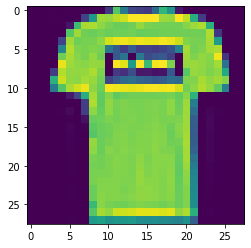

In [37]:
(X_train, y_train), (X_test, y_test) = tensorflow.keras.datasets.fashion_mnist.load_data()
print("X_train.shape:", X_train.shape, "y_train.shape:", y_train.shape, "X_test.shape:", X_test.shape, "y_test.shape:", y_test.shape)
N, H, W = X_train.shape
K = len(set(y_train))
print("number of classes:", K)

print("sample image -")
plt.imshow(X_train[1])

X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

X_train.shape

In [38]:
i = Input(shape = (X_train[0].shape))
x = Conv2D(32, (3,3), strides = 2, padding = 'same', activation = 'relu')(i)
x = Conv2D(64, (3,3), strides = 2, padding = 'same', activation = 'relu')(x)
x = Conv2D(128, (3,3), strides = 2, padding = 'same', activation = 'relu')(x)
x = GlobalMaxPooling2D()(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)

model = Model(i,x)

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

r = model.fit (X_train, y_train, validation_data = (X_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.5092 - accuracy: 0.8144 - val_loss: 0.3956 - val_accuracy: 0.8555
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3203 - accuracy: 0.8826 - val_loss: 0.3207 - val_accuracy: 0.8829
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2719 - accuracy: 0.9002 - val_loss: 0.3079 - val_accuracy: 0.8874
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2395 - accuracy: 0.9102 - val_loss: 0.2817 - val_accuracy: 0.8972
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2158 - accuracy: 0.9185 - val_loss: 0.2963 - val_accuracy: 0.8925
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1947 - accuracy: 0.9271 - val_loss: 0.2661 - val_accuracy: 0.9047
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1758 - accuracy: 0.9341 - val_loss: 0.2595 -

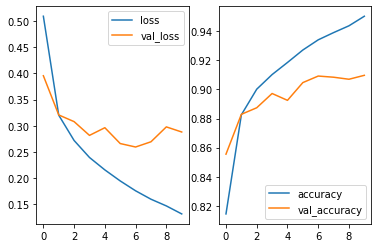

In [39]:
plt.subplot(1,2,1)
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

plt.show()

In [40]:
p_test = model.predict(X_test).argmax(axis=1)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, p_test)

array([[894,   0,  17,  15,   2,   1,  61,   0,  10,   0],
       [  1, 973,   1,  19,   1,   0,   3,   0,   2,   0],
       [ 20,   1, 886,  10,  33,   0,  50,   0,   0,   0],
       [ 22,   1,   8, 918,  25,   1,  22,   0,   3,   0],
       [  2,   1,  88,  30, 821,   0,  57,   0,   1,   0],
       [  0,   0,   0,   1,   0, 981,   0,  10,   1,   7],
       [152,   1,  59,  22,  48,   0, 709,   0,   9,   0],
       [  0,   0,   0,   0,   0,  16,   0, 967,   1,  16],
       [  0,   0,   3,   3,   3,   2,   3,   0, 985,   1],
       [  1,   0,   0,   0,   0,   7,   0,  29,   0, 963]])

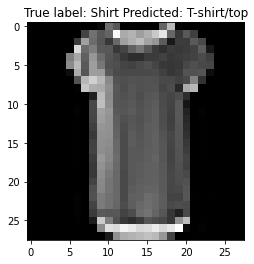

In [41]:
# Label mapping
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));